<a href="https://colab.research.google.com/github/SAKSHIGGG/Titanic_Survival_Prediction/blob/main/titanic_1952.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task: To Predict Survival on Titanic

## Import the relevant libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Mount the Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Get the data

In [ ]:
train = pd.read_csv('/content/drive/MyDrive/Data/titanic/train.csv')
test = pd.read_csv('/content/drive/MyDrive/Data/titanic/test.csv')

Concate the training and test set to see the whole data together.

In [ ]:
train['dummy_col'] = 1
test['dummy_col'] = 0
test['Survived'] = np.NaN
data = pd.concat([train, test])

## Exploratory Data Analysis

In [ ]:
# Getting first five observations of the training data
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,dummy_col
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


### Getting the shape of training and test set

 Shape implies Number of observations and attributes (features) 

In [ ]:
pd.DataFrame({'No of Observations':[train.shape[0], test.shape[0]],\
              'No of attributes':[train.shape[1], test.shape[1]]},\
             index=['Training Data', 'Test Data'])

,No of Observations,No of attributes
Training Data,891,13
Test Data,418,13


Getting the information about each attribute

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  dummy_col    891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


Getting the summary of each numerical attribute

In [ ]:
train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292
dummy_col,891.0,1.000000,0.000000,1.00,1.0000,1.0000,1.0,1.0000


Getting the number of missing values in each attribute

In [ ]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dummy_col        0
dtype: int64

### Distribution of *Age*, *Fare* features

	Skewness in 'Age' feature: 0.39			Skewness in 'Fare' feature: 4.79


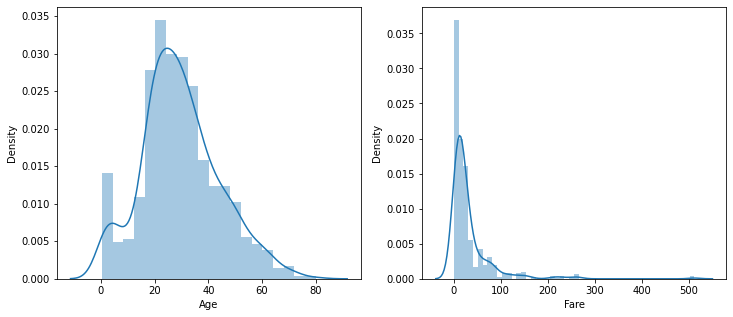

In [ ]:
print("\tSkewness in 'Age' feature: {}\t\t\tSkewness in 'Fare' feature: {}"\
      .format(np.round(train['Age'].skew(), 2),\
              np.round(train['Fare'].skew(), 2)))

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.distplot(train['Age'])
plt.subplot(1, 2, 2)
sns.distplot(train['Fare'])
plt.show()

### Distribution of *Parch*, *SibSp*, *Pclass*, *Sex*, *Embarked* features with respect to **Survived** feature

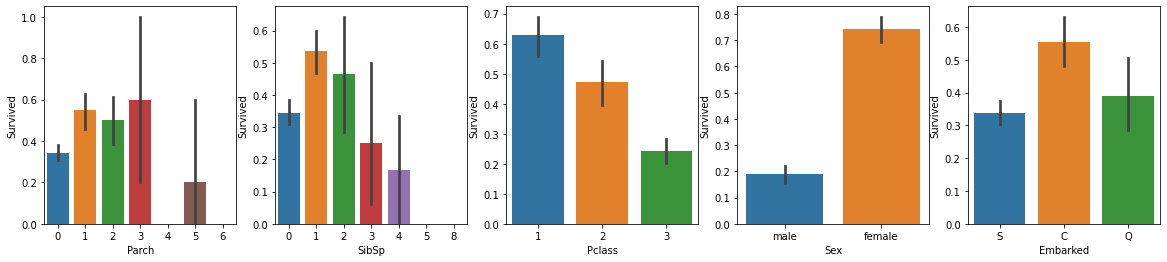

In [ ]:
a = ['Parch', 'SibSp', 'Pclass', 'Sex', 'Embarked']
plt.figure(figsize=(20, 4))
for i in range(len(a)):
  plt.subplot(1, 5, i+1)
  sns.barplot(x=train[a[i]],y=train.Survived)

Since "Parch" and "SibSp" features have quite similar relationship with target "Survived".
So, it's better to merge them as a single feature


In [ ]:
data['family'] = data['Parch'] + data['SibSp']

## Data Cleaning

### Dealing with missing values

In [ ]:
data['Fare'] = data['Fare'].fillna(train['Fare'].median())
data['Age'] = data['Age'].fillna(train['Age'].median())
data['Embarked'] = data['Embarked'].fillna(train['Embarked'].mode()[0])

Creating a new feature called **Cabin_Id** based on whether Cabin Number is mentioned or not against each Passenger in the data 

In [ ]:
data['Cabin_Id'] = np.where(data.Cabin.isnull(),0,1)

### Dropping the irrelevant features



In [ ]:
data = data.drop(labels=['Parch','SibSp','Cabin'], axis=1)

Remove personal identification attributes such as *Name*, *Ticket*, *PassengerId*, *Embarked* from the data, since these features has not determining power on the survival of a passenger.

In [ ]:
data = data.drop(labels=['Name','Ticket','PassengerId', 'Embarked'], axis=1)

In [ ]:
data['Sex'] = data['Sex'].map({'male':0,'female':1})

### Creating dummies

In [ ]:
data['Pclass'] = data['Pclass'].astype('object')
encoded_data = pd.get_dummies(data, columns=['Pclass'])
encoded_data.head()

,Survived,Sex,Age,Fare,dummy_col,family,Cabin_Id,Pclass_1,Pclass_2,Pclass_3
0,0.0,0,22.0,7.2500,1,1,0,0,0,1
1,1.0,1,38.0,71.2833,1,1,1,1,0,0
2,1.0,1,26.0,7.9250,1,0,0,0,0,1
3,1.0,1,35.0,53.1000,1,1,1,1,0,0
4,0.0,0,35.0,8.0500,1,0,0,0,0,1


## Splitting training and test dataset

In [ ]:
train_data = encoded_data[encoded_data['dummy_col']==1]
test_data = encoded_data[encoded_data['dummy_col']==0].drop(['Survived'],axis=1)

In [ ]:
print('Shape of training data: {}\nShape of test data: {}'\
      .format(train_data.shape,test_data.shape))

Shape of training data: (891, 10)
Shape of test data: (418, 9)


## Declare dependent and independent attributes in training set

In [ ]:
x_train = train_data.drop(labels='Survived',axis=1)
y_train = train_data['Survived']

## Standardizing the data

In [ ]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler

sca = StandardScaler()

sca.fit(x_train)   
x_train = sca.transform(x_train)    
x_test = sca.transform(test_data)

## Train the data on different algorithms on different hyperparameters with five fold validation

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
def classifier(a,name):
    print('For {},\nbest score:{} \nbest parameter: {}'.format(name, np.round(a.best_score_, 2), a.best_params_))

### Logistic Regression Algorithm

In [ ]:
reg = LogisticRegression()
param = {'C':[0.01,0.1,1,10,100]}
cv = GridSearchCV(reg, param, cv=5)
lr = cv.fit(x_train, y_train)

classifier(lr,'Logistic Regression model')

For Logistic Regression model,
best score:0.8 
best parameter: {'C': 0.1}


### Decision Tree Algorithm

In [ ]:
dt = DecisionTreeClassifier()
param = {'max_depth':[2,4,8]}
cv = GridSearchCV(dt, param, cv=5)
dt = cv.fit(x_train, y_train)

classifier(dt,'Decision Tree model')

For Decision Tree model,
best score:0.81 
best parameter: {'max_depth': 8}


### Random Forest Algorithm

In [ ]:
rf = RandomForestClassifier()
param = {'max_depth':[2,4,8],'n_estimators':[5,50,100]}
cv = GridSearchCV(rf, param, cv=5)
rf = cv.fit(x_train, y_train)

classifier(rf,'Random Forest model')

For Random Forest model,
best score:0.83 
best parameter: {'max_depth': 8, 'n_estimators': 100}


In [ ]:
pd.DataFrame({'Model_Name':['Logistic Regression', 'Decision Tree', 'Random Forest'], 
              'Best_score':[lr.best_score_, dt.best_score_, rf.best_score_]})

,Model_Name,Best_score
0,Logistic Regression,0.802454
1,Decision Tree,0.812586
2,Random Forest,0.828316


## Refitting (Retrain) the data set to best scored model

 Fitting the data to Random Forest algorithm with parameteres:
 max_depth = 8, n_estimators = 50


In [ ]:
cp.best_estimator_.fit(x_train,y_train)

RandomForestClassifier(max_depth=8, n_estimators=50)

## Predict the test data

In [ ]:
sub = cp.best_estimator_.predict(x_test)

Create a dataframe whether a passenger survives or not along with their Id

In [ ]:
test_pred = pd.DataFrame({'PassengerId':test.PassengerId,'Survived':sub.astype('int')})

Saving the prediction to a csv file

In [ ]:
test_pred.to_csv('/content/drive/MyDrive/Data/titanic/Submission.csv',index=False)
print('Submission is ready')

Submission is ready
